# Distracted Driver Detection Using Convolutional Neural Networks

![distracted-driver-photo](images/distracted-driver-photo.png)

**Name**: Jordana Tepper  
**Pace**: Full Time  
**Instructor**: Joseph Mata  

## Overview

This project utilizes a dataset containing numerous images of various driving behaviors to perform image classification. The goal of this project is to build a model that can detect distracted driving tendencies and aid State Farm in implementing a new program that tracks drivers' behaviors through the use of a dashboard camera (with permission). Using the information collected by the dashcam, State Farm would offer their clients an insurance quote based on the respective driver's actions at the wheel (safer driving leads to a lower quote, and distracted driving leads to a higher quote). State Farm hopes that this new program can incentivize its clients to practice safer driving and consequently improve road safety.

Through the use of Convolutional Neural Networks (CNNs) and transfer learning, I produced 10 different models to eventually achieve the best accuracy score: 88.17%.

## Business Understanding


### What is Distracted Driving?

There are three main types of distracted driving:

**Visual:** taking your eyes off the road   
**Manual:** taking your hands off the wheel   
**Cognitive:** taking your mind off driving   

### Why is Distracted Driving a Problem?

According to [CDC data](https://www.cdc.gov/transportationsafety/distracted_driving/index.html#:~:text=Nine%20people%20in%20the%20United,to%20involve%20a%20distracted%20driver.&text=Distracted%20driving%20is%20doing%20another,of%20a%20motor%20vehicle%20crash.) from 2019, approximately 3,142 people were killed, and 424,000 people were injured from a car crash involving a distracted driver in the United States that year. This translates to 9 people per day being killed due to distracted driving. Furthermore, of the people killed in distracted driving accidents, 1 in 5 of these individuals were not in vehicles (i.e., walking, biking, etc.) 

### What can be done to help reduce Distracted Driving?

Due to the ongoing problem of distracted driving, State Farm has proposed the idea of offering clients the option of being recorded while driving to track their behavior at the wheel. This would be done through the means of a dashboard camera that would continuously take pictures of the driver and classify their actions according to 10 categories:   
  * safe driving   
  * texting with their right hand   
  * talking on the phone with their right hand   
  * texting with their left hand   
  * talking on the phone with their left hand  
  * operating the radio    
  * drinking a beverage   
  * reaching behind  
  * fixing hair and/or makeup  
  * talking to a passenger   

After two months of observation and a report produced by the dashcam, State Farm would then offer the client an insurance quote based on their driving tendencies. In other words, safer driving would result in paying less money for insurance, whereas unsafe driving would result in a higher quote. Hopefully, such an incentive could lead to individuals practicing safer driving habits - benefiting both them and the greater population.

## Data Understanding

The data that I used for this project comes from a dataset from [Kaggle](https://www.kaggle.com/c/state-farm-distracted-driver-detection) titled "State Farm Distracted Driver Detection."

The dataset consists of 22,424 photos belonging to 10 classes. I split each class into train and validation groupings, with 80% of the images in the train data and 20% in the validation data. 

Regarding the test data, the data source provided a folder of 79,388 unlabeled images. After going through many of these images, I manually labeled 338 of them, with each class containing 33 test photos, on average. 

A critical component of this project is that no driver appeared in both the train/validation data and the test data. This was done to prevent the model from learning the drivers' faces as opposed to the drivers' actions.

#### The 10 classes are as follows:

**c0 = SAFE DRIVING**  
**c1 = TEXTING WITH RIGHT HAND**  
**c2 = TALKING ON THE PHONE WITH RIGHT HAND**  
**c3 = TEXTING WITH LEFT HAND**  
**c4 = TALKING ON THE PHONE WITH LEFT HAND**  
**c5 = OPERATING THE RADIO**  
**c6 = DRINKING A BEVERAGE**  
**c7 = REACHING BEHIND**  
**c8 = HAIR AND MAKEUP**  
**c9 = TALKING TO PASSENGER**  

In [289]:
# Basic imports
import pandas as pd
import numpy as np
import os
import pickle
import warnings
warnings.filterwarnings("ignore")

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

# Modeling
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model, load_model
from keras import layers
from keras import models
from keras import optimizers
from keras.models import model_from_json
from PIL import Image
from skimage import transform
from tensorflow.keras import regularizers
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [290]:
# Loading sample images

c0_img = Image.open('split_data/correct_train/c0/img_208.jpg')
c0_img = c0_img.resize((320, 240))

c1_img = Image.open('split_data/correct_train/c1/img_115.jpg')
c1_img = c1_img.resize((320, 240))

c2_img = Image.open('split_data/correct_train/c2/img_271.jpg')
c2_img = c2_img.resize((320, 240))

c3_img = Image.open('split_data/correct_train/c3/img_477.jpg')
c3_img = c3_img.resize((320, 240))

c4_img = Image.open('split_data/correct_train/c4/img_1762.jpg')
c4_img = c4_img.resize((320, 240))

c5_img = Image.open('split_data/correct_train/c5/img_1605.jpg')
c5_img = c5_img.resize((320, 240))

c6_img = Image.open('split_data/correct_train/c6/img_372.jpg')
c6_img = c6_img.resize((320, 240))

c7_img = Image.open('split_data/correct_train/c7/img_845.jpg')
c7_img = c7_img.resize((320, 240))

c8_img = Image.open('split_data/correct_train/c8/img_2667.jpg')
c8_img = c8_img.resize((320, 240))

c9_img = Image.open('split_data/correct_train/c9/img_2412.jpg')
c9_img = c9_img.resize((320, 240))

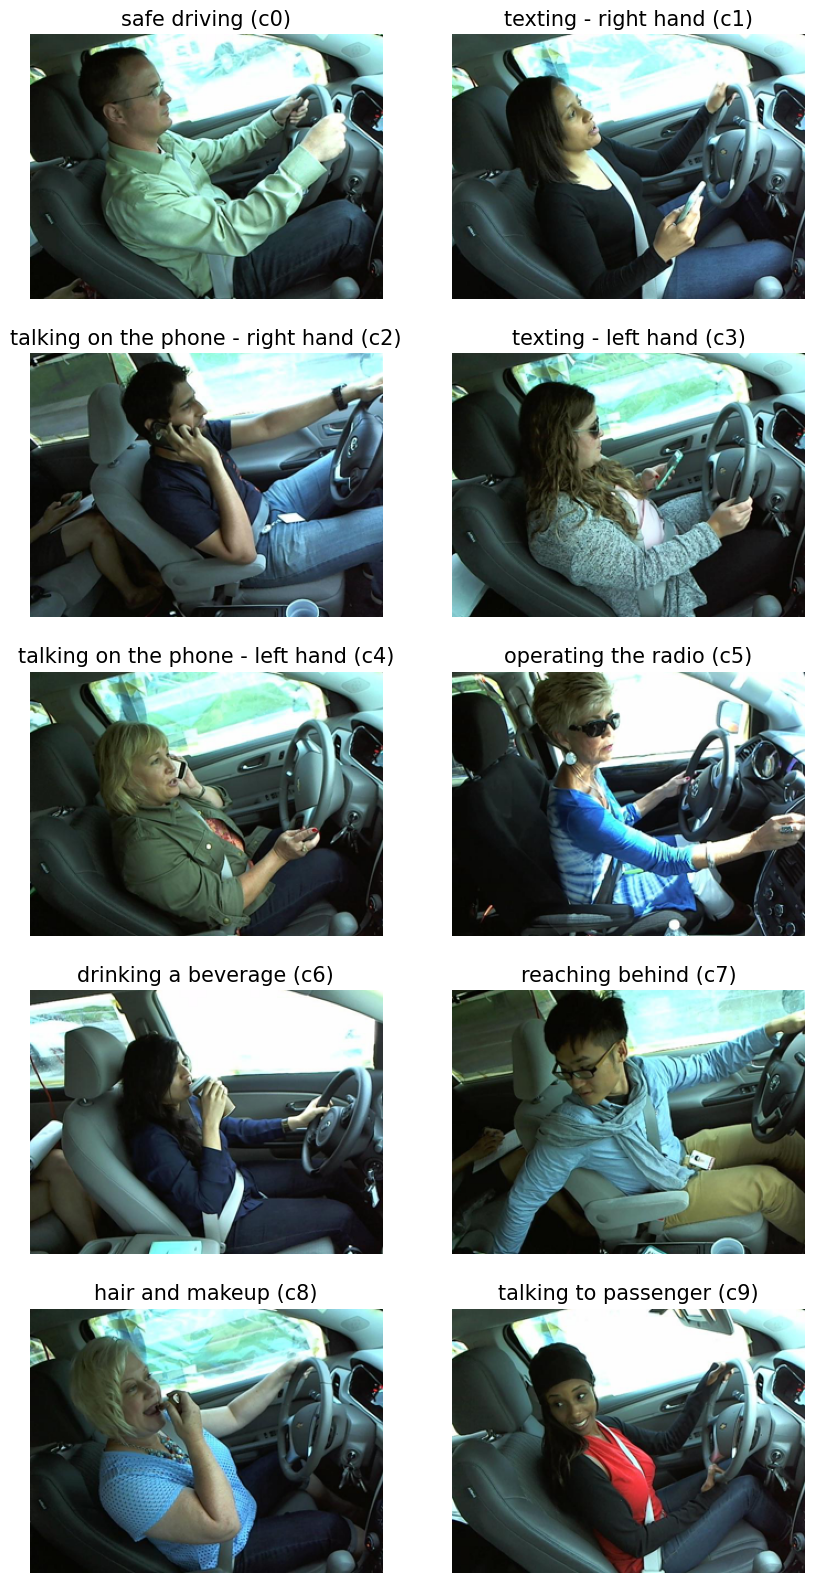

In [291]:
# Visualizing sample images
fig = plt.figure(figsize=(10, 20))
rows = 5
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(c0_img)
plt.axis('off')
plt.title("safe driving (c0)",  fontdict = {'fontsize': 15})

fig.add_subplot(rows, columns, 2)
plt.imshow(c1_img)
plt.axis('off')
plt.title("texting - right hand (c1)",  fontdict = {'fontsize': 15})

fig.add_subplot(rows, columns, 3)
plt.imshow(c2_img)
plt.axis('off')
plt.title("talking on the phone - right hand (c2)",  fontdict = {'fontsize': 15})

fig.add_subplot(rows, columns, 4)
plt.imshow(c3_img)
plt.axis('off')
plt.title("texting - left hand (c3)",  fontdict = {'fontsize': 15})

fig.add_subplot(rows, columns, 5)
plt.imshow(c4_img)
plt.axis('off')
plt.title("talking on the phone - left hand (c4)",  fontdict = {'fontsize': 15})

fig.add_subplot(rows, columns, 6)
plt.imshow(c5_img)
plt.axis('off')
plt.title("operating the radio (c5)",  fontdict = {'fontsize': 15})

fig.add_subplot(rows, columns, 7)
plt.imshow(c6_img)
plt.axis('off')
plt.title("drinking a beverage (c6)",  fontdict = {'fontsize': 15})

fig.add_subplot(rows, columns, 8)
plt.imshow(c7_img)
plt.axis('off')
plt.title("reaching behind (c7)",  fontdict = {'fontsize': 15})

fig.add_subplot(rows, columns, 9)
plt.imshow(c8_img)
plt.axis('off')
plt.title("hair and makeup (c8)",  fontdict = {'fontsize': 15})

fig.add_subplot(rows, columns, 10)
plt.imshow(c9_img)
plt.axis('off')
plt.title("talking to passenger (c9)",  fontdict = {'fontsize': 15});

## Data Analysis

### Visualizing Class Sizes

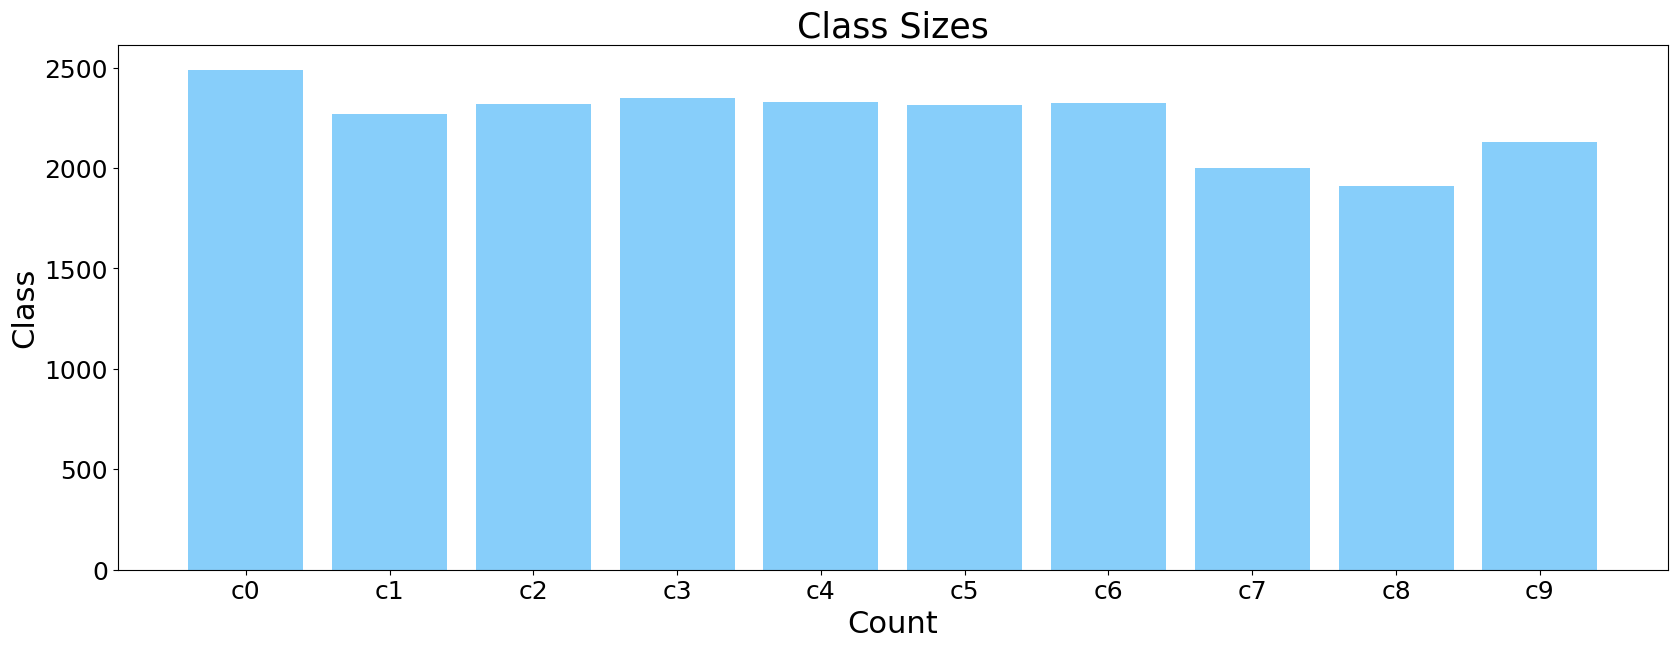

In [292]:
# Calculating the class sizes

train_c0 = 'split_data/correct_train/c0'
train_c0_len = len([file for file in os.listdir(train_c0) if file.endswith('.jpg')])

train_c1 = 'split_data/correct_train/c1'
train_c1_len = len([file for file in os.listdir(train_c1) if file.endswith('.jpg')])

train_c2 = 'split_data/correct_train/c2'
train_c2_len = len([file for file in os.listdir(train_c2) if file.endswith('.jpg')])

train_c3 = 'split_data/correct_train/c3'
train_c3_len = len([file for file in os.listdir(train_c3) if file.endswith('.jpg')])

train_c4 = 'split_data/correct_train/c4'
train_c4_len = len([file for file in os.listdir(train_c4) if file.endswith('.jpg')])

train_c5 = 'split_data/correct_train/c5'
train_c5_len = len([file for file in os.listdir(train_c5) if file.endswith('.jpg')])

train_c6 = 'split_data/correct_train/c6'
train_c6_len = len([file for file in os.listdir(train_c6) if file.endswith('.jpg')])

train_c7 = 'split_data/correct_train/c7'
train_c7_len = len([file for file in os.listdir(train_c7) if file.endswith('.jpg')])

train_c8 = 'split_data/correct_train/c8'
train_c8_len = len([file for file in os.listdir(train_c8) if file.endswith('.jpg')])

train_c9 = 'split_data/correct_train/c9'
train_c9_len = len([file for file in os.listdir(train_c9) if file.endswith('.jpg')])

sizes = [train_c0_len, train_c1_len, train_c2_len, train_c3_len, train_c4_len, train_c5_len, train_c6_len,
        train_c7_len, train_c8_len, train_c9_len]

categories = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']

# Plotting the class sizes

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(211)

ax.bar(categories, sizes, color = "lightskyblue")
ax.tick_params(axis='both', which='major', labelsize=18)

plt.title('Class Sizes',size=25)
plt.ylabel('Class',size=22)
plt.xlabel('Count',size=22)

plt.show()


## Modeling

The dataset is quite large and the classes are relatively balanced, so no data augmentation is needed.

In [293]:
# All images will be rescaled by 1./255

train_dir = 'split_data/correct_train'
test_dir = 'split_data/correct_test'


train_datagen = ImageDataGenerator(rescale=1./255, validation_split = 0.20)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    # All images will be resized to 160x120
    target_size=(160, 120),
    batch_size=7177,
    class_mode='categorical',
    subset = 'training')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    # All images will be resized to 160x120
    target_size=(160, 120),
    batch_size=338,
    class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    # All images will be resized to 160x120
    target_size=(160, 120),
    batch_size=1792,
    class_mode='categorical',
    subset = 'validation')

Found 17943 images belonging to 10 classes.
Found 338 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.


In [294]:
# Generating the images and labels

train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(validation_generator)

In [295]:
train_images.shape

(7177, 160, 120, 3)

In [296]:
train_labels.shape

(7177, 10)

In [297]:
val_images.shape

(1792, 160, 120, 3)

In [298]:
val_labels.shape

(1792, 10)

### Baseline Model

In [123]:
# Building the model

baseline_model = Sequential()
baseline_model.add(layers.Flatten())
baseline_model.add(layers.Dense(10,activation='softmax'))

In [124]:
# Compiling the model

baseline_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [126]:
# Fitting the model

baseline_history = baseline_model.fit(train_images,
                    train_labels,
                    epochs=30,
                    batch_size = 10,
                    validation_data = (val_images, val_labels))

Epoch 1/30
  5/718 [..............................] - ETA: 10s - loss: 2.9322 - acc: 0.1800 

2022-12-27 15:20:30.464821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - ETA: 0s - loss: 1.4377 - acc: 0.5465

2022-12-27 15:20:38.212850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - 9s 13ms/step - loss: 1.4377 - acc: 0.5465 - val_loss: 0.7996 - val_acc: 0.7731
Epoch 2/30
718/718 [==============================] - 9s 12ms/step - loss: 0.5604 - acc: 0.8525 - val_loss: 0.3880 - val_acc: 0.9144
Epoch 3/30
718/718 [==============================] - 9s 12ms/step - loss: 0.3419 - acc: 0.9196 - val_loss: 0.2805 - val_acc: 0.9416
Epoch 4/30
718/718 [==============================] - 9s 12ms/step - loss: 0.2285 - acc: 0.9534 - val_loss: 0.2086 - val_acc: 0.9611
Epoch 5/30
718/718 [==============================] - 9s 12ms/step - loss: 0.1760 - acc: 0.9607 - val_loss: 0.2612 - val_acc: 0.9298
Epoch 6/30
718/718 [==============================] - 9s 12ms/step - loss: 0.1404 - acc: 0.9684 - val_loss: 0.1960 - val_acc: 0.9518
Epoch 7/30
718/718 [==============================] - 9s 12ms/step - loss: 0.1065 - acc: 0.9778 - val_loss: 0.1639 - val_acc: 0.9585
Epoch 8/30
718/718 [==============================] - 9s 12ms/step - loss: 0.098

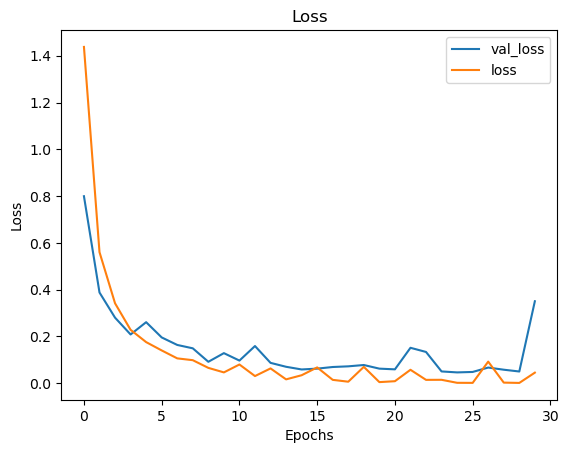

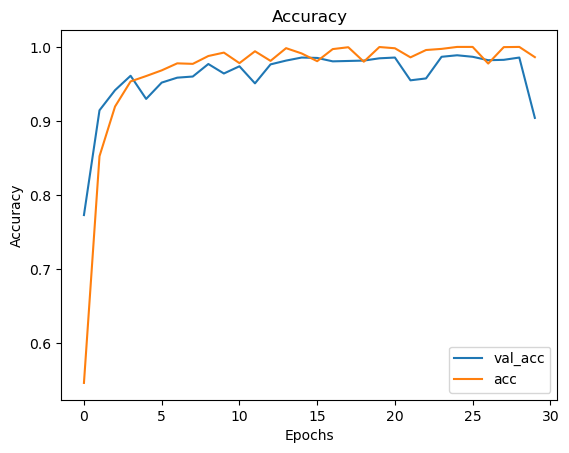

In [127]:
# Plotting accuracy and loss

plt.figure() 
plt.plot(baseline_history.history['val_loss']) 
plt.plot(baseline_history.history['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(baseline_history.history['val_acc'])
plt.plot(baseline_history.history['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [128]:
# Evaluating the model on train, validation, and test data

baseline_results_train = baseline_model.evaluate(train_images, train_labels)
baseline_results_val = baseline_model.evaluate(val_images, val_labels)
baseline_results_test = baseline_model.evaluate(test_images, test_labels)

11/11 [==============================] - 0s 12ms/step - loss: 6.7822 - acc: 0.3136


11/11 [==============================] - 0s 4ms/step


2022-12-27 15:24:57.250306: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


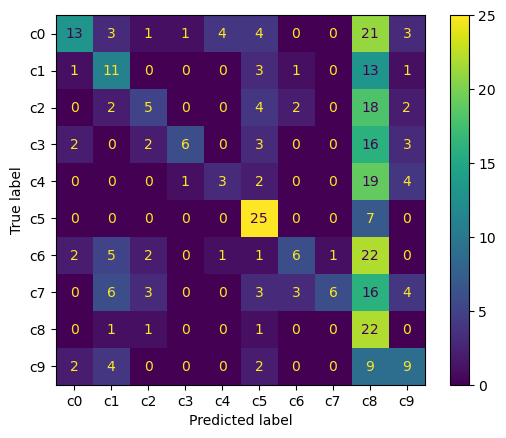

In [129]:
# Plotting the model confusion matrix

class_names = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred
classifier = estimator(baseline_model, class_names)
plot_confusion_matrix(estimator=classifier, 
                      X=test_images, 
                      y_true=np.argmax(test_labels, axis = -1),
                      display_labels=class_names);

### Model 1

In [19]:
# Building the model

model1 = Sequential()

model1.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(160, 120, 3)))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D(pool_size=(2,2),padding='same'))

model1.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(160, 120, 3)))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D(pool_size=(2,2),padding='same'))

model1.add(layers.Dropout(0.3))
model1.add(layers.Flatten())
model1.add(layers.Dense(256,activation='relu'))
model1.add(layers.Dense(10,activation='softmax'))

In [20]:
# Defining early stoppping

es = EarlyStopping(monitor = 'val_acc', mode = 'max', min_delta = 1e-8, 
                  patience = 10)

# Compiling the model

model1.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [21]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 158, 118, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 158, 118, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 79, 59, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 77, 57, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 77, 57, 64)       256       
 hNormalization)                                                 
                                                      

In [22]:
# Fitting the model

history_1 = model1.fit(train_images,
                    train_labels,
                    epochs=30,
                    callbacks = [es],
                    batch_size = 10,
                    validation_data = (val_images, val_labels))

Epoch 1/30
  1/718 [..............................] - ETA: 6:48 - loss: 4.3009 - acc: 0.0000e+00

2022-12-26 22:34:55.096959: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - ETA: 0s - loss: 0.9318 - acc: 0.7227

2022-12-26 22:35:19.850577: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - 27s 37ms/step - loss: 0.9318 - acc: 0.7227 - val_loss: 0.2092 - val_acc: 0.9513
Epoch 2/30
718/718 [==============================] - 26s 36ms/step - loss: 0.1006 - acc: 0.9734 - val_loss: 0.0662 - val_acc: 0.9831
Epoch 3/30
718/718 [==============================] - 26s 37ms/step - loss: 0.0417 - acc: 0.9891 - val_loss: 0.0473 - val_acc: 0.9857
Epoch 4/30
718/718 [==============================] - 26s 37ms/step - loss: 0.0459 - acc: 0.9865 - val_loss: 0.0748 - val_acc: 0.9805
Epoch 5/30
718/718 [==============================] - 26s 36ms/step - loss: 0.0661 - acc: 0.9799 - val_loss: 0.1389 - val_acc: 0.9652
Epoch 6/30
718/718 [==============================] - 26s 36ms/step - loss: 0.0365 - acc: 0.9900 - val_loss: 0.1084 - val_acc: 0.9749
Epoch 7/30
718/718 [==============================] - 26s 37ms/step - loss: 0.0211 - acc: 0.9940 - val_loss: 0.0577 - val_acc: 0.9872
Epoch 8/30
718/718 [==============================] - 29s 41ms/step - los

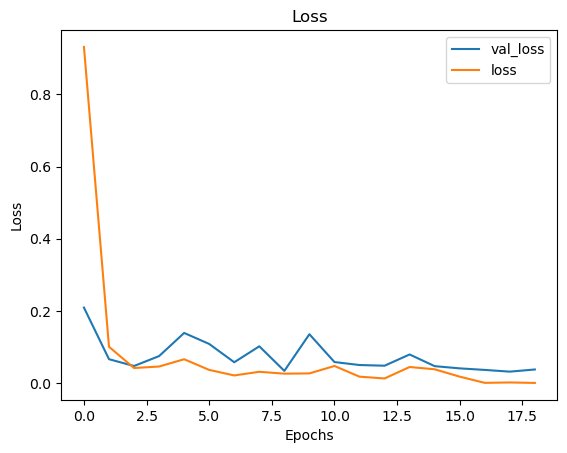

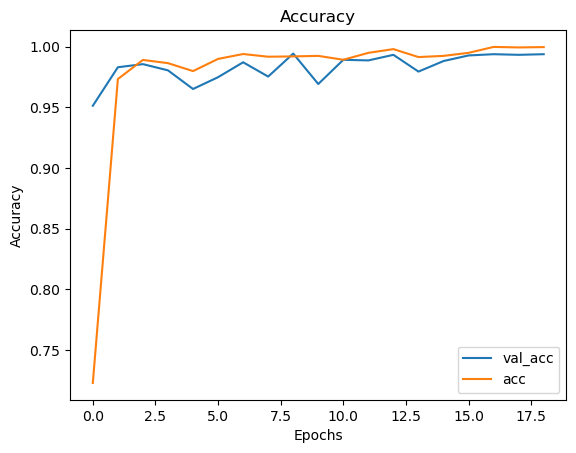

In [23]:
# Plotting accuracy and loss

plt.figure() 
plt.plot(history_1.history['val_loss']) 
plt.plot(history_1.history['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(history_1.history['val_acc'])
plt.plot(history_1.history['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [24]:
# Evaluating the model on train, validation, and test data

model1_results_train = model1.evaluate(train_images, train_labels)
model1_results_val = model1.evaluate(val_images, val_labels)
model1_results_test = model1.evaluate(test_images, test_labels)

11/11 [==============================] - 0s 37ms/step - loss: 3.8959 - acc: 0.5178


 5/11 [============>.................] - ETA: 0s

2022-12-26 22:44:44.978167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 0s 35ms/step


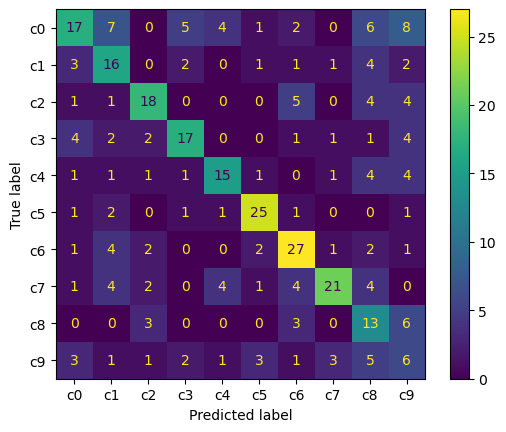

In [25]:
# Plotting the model confusion matrix

class_names = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred
classifier = estimator(model1, class_names)
plot_confusion_matrix(estimator=classifier, 
                      X=test_images, 
                      y_true=np.argmax(test_labels, axis = -1),
                      display_labels=class_names);

### Model 2

In [26]:
# Building the model

model2 = Sequential()

model2.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(160, 120, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.3))

model2.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(160, 120, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.3))

model2.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(160, 120, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.3))

model2.add(layers.Flatten())
model2.add(layers.Dense(512,activation='relu'))
model2.add(layers.Dense(10,activation='softmax'))

In [27]:
# Defining early stopping

es = EarlyStopping(monitor = 'val_acc', mode = 'max', min_delta = 1e-8, 
                  patience = 10)

# Compiling the model

model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [28]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 158, 118, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 79, 59, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 79, 59, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 79, 59, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 77, 57, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 38, 28, 64)      

In [29]:
# Fitting the model

history_2 = model2.fit(train_images,
                    train_labels,
                    epochs=30,
                    callbacks = [es],
                    batch_size = 10,
                    validation_data = (val_images, val_labels))

Epoch 1/30


2022-12-26 22:44:47.194160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - ETA: 0s - loss: 1.0703 - acc: 0.6703

2022-12-26 22:45:17.816458: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - 33s 45ms/step - loss: 1.0703 - acc: 0.6703 - val_loss: 0.8408 - val_acc: 0.7059
Epoch 2/30
718/718 [==============================] - 32s 44ms/step - loss: 0.2271 - acc: 0.9293 - val_loss: 0.2585 - val_acc: 0.9237
Epoch 3/30
718/718 [==============================] - 32s 45ms/step - loss: 0.1440 - acc: 0.9579 - val_loss: 0.1854 - val_acc: 0.9442
Epoch 4/30
718/718 [==============================] - 32s 45ms/step - loss: 0.1079 - acc: 0.9679 - val_loss: 0.4153 - val_acc: 0.8683
Epoch 5/30
718/718 [==============================] - 33s 45ms/step - loss: 0.0892 - acc: 0.9735 - val_loss: 0.2071 - val_acc: 0.9324
Epoch 6/30
718/718 [==============================] - 32s 45ms/step - loss: 0.0889 - acc: 0.9752 - val_loss: 0.1953 - val_acc: 0.9370
Epoch 7/30
718/718 [==============================] - 32s 44ms/step - loss: 0.0777 - acc: 0.9776 - val_loss: 0.1116 - val_acc: 0.9662
Epoch 8/30
718/718 [==============================] - 32s 45ms/step - los

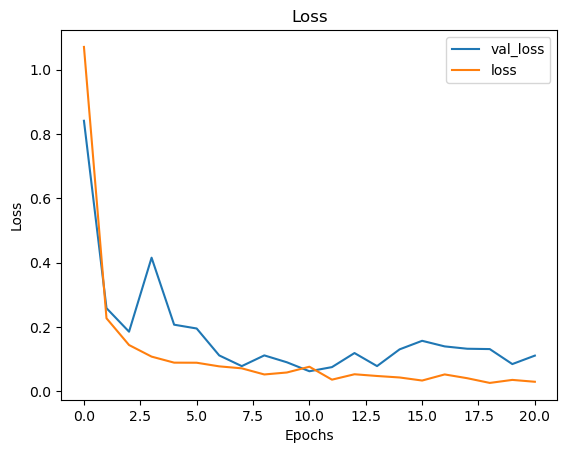

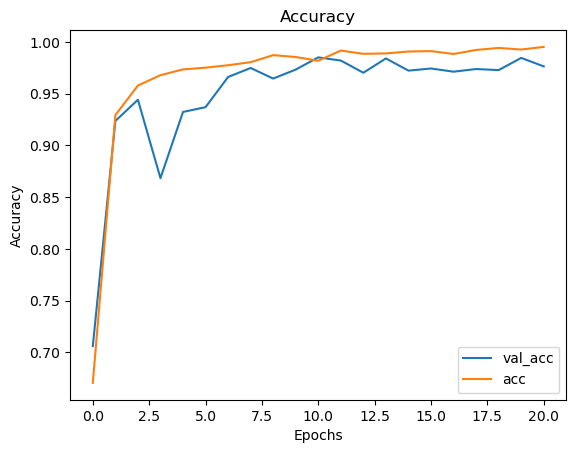

In [30]:
# Plotting accuracy and loss

plt.figure() 
plt.plot(history_2.history['val_loss']) 
plt.plot(history_2.history['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(history_2.history['val_acc'])
plt.plot(history_2.history['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [31]:
# Evaluating the model on train, validation, and test data

model2_results_train = model2.evaluate(train_images, train_labels)
model2_results_val = model2.evaluate(val_images, val_labels)
model2_results_test = model2.evaluate(test_images, test_labels)

11/11 [==============================] - 0s 34ms/step - loss: 4.1724 - acc: 0.5444


 5/11 [============>.................] - ETA: 0s

2022-12-26 22:56:28.495692: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 0s 33ms/step


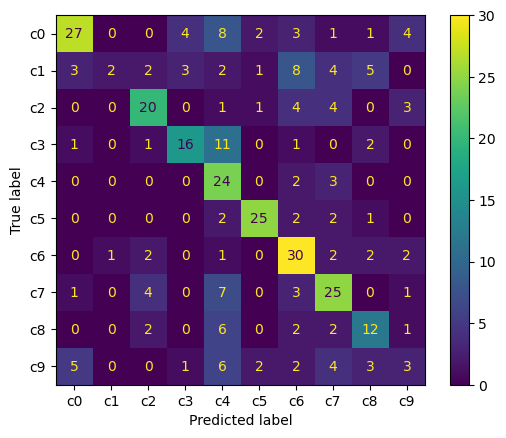

In [32]:
# Plotting the model confusion matrix

class_names = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred
classifier = estimator(model2, class_names)
plot_confusion_matrix(estimator=classifier, 
                      X=test_images, 
                      y_true=np.argmax(test_labels, axis = -1),
                      display_labels=class_names);

### Using Pre-trained Models

### Model 3 - ResNet 50

In [33]:
# Defining the resnet50 model

resnet50 = ResNet50(weights='imagenet',include_top=False,input_shape = (160,120,3))

# Freezing all layers but the last 3

for layer in resnet50.layers[:-3]:
    layer.trainable=False

In [34]:
# Building the model

model3 = models.Sequential()
model3.add(resnet50)

model3.add(layers.Flatten())
model3.add(layers.Dense(512,activation = 'relu'))
model3.add(layers.Dense(10,activation = 'softmax'))

In [35]:
# Defining early stopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=3)

# Compiling the model
model3.compile(loss='categorical_crossentropy',
               optimizer = optimizers.Adam(lr=1e-4),
               metrics=['acc'])

In [146]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 4, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 40960)             0         
                                                                 
 dense_5 (Dense)             (None, 512)               20972032  
                                                                 
 dense_6 (Dense)             (None, 10)                5130      
                                                                 
Total params: 44,564,874
Trainable params: 20,981,258
Non-trainable params: 23,583,616
_________________________________________________________________


In [36]:
# Fitting the model

history_3 = model3.fit(train_images,
                    train_labels,
                    epochs=30,
                    callbacks = [es],
                    batch_size = 10,
                    validation_data = (val_images, val_labels))

Epoch 1/30


2022-12-26 22:56:32.588086: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - ETA: 0s - loss: 1.4417 - acc: 0.5225

2022-12-26 22:57:31.532586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - 72s 98ms/step - loss: 1.4417 - acc: 0.5225 - val_loss: 1.0363 - val_acc: 0.6793
Epoch 2/30
718/718 [==============================] - 72s 101ms/step - loss: 0.6795 - acc: 0.8012 - val_loss: 0.5212 - val_acc: 0.8514
Epoch 3/30
718/718 [==============================] - 72s 101ms/step - loss: 0.4311 - acc: 0.8850 - val_loss: 0.3931 - val_acc: 0.8863
Epoch 4/30
718/718 [==============================] - 70s 97ms/step - loss: 0.2856 - acc: 0.9283 - val_loss: 0.3731 - val_acc: 0.8883
Epoch 5/30
718/718 [==============================] - 71s 99ms/step - loss: 0.2319 - acc: 0.9399 - val_loss: 0.3890 - val_acc: 0.8822
Epoch 6/30
718/718 [==============================] - 74s 103ms/step - loss: 0.1768 - acc: 0.9558 - val_loss: 0.1842 - val_acc: 0.9529
Epoch 7/30
718/718 [==============================] - 74s 104ms/step - loss: 0.1567 - acc: 0.9565 - val_loss: 0.2299 - val_acc: 0.9349
Epoch 8/30
718/718 [==============================] - 75s 104ms/step 

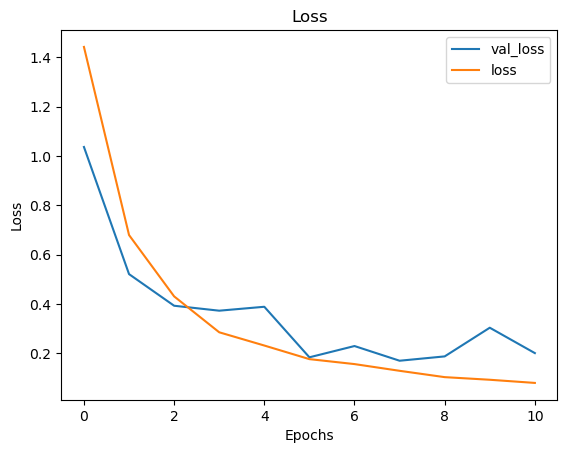

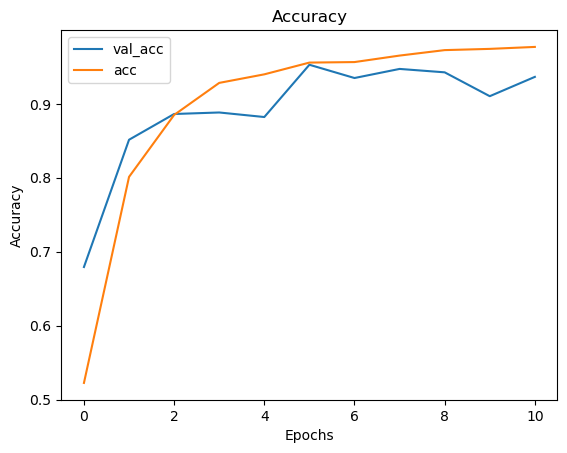

In [37]:
# Plotting accuracy and loss

plt.figure() 
plt.plot(history_3.history['val_loss']) 
plt.plot(history_3.history['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(history_3.history['val_acc'])
plt.plot(history_3.history['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [38]:
# Evaluating the model on train, validation, and test data

model3_results_train = model3.evaluate(train_images, train_labels)
model3_results_val = model3.evaluate(val_images, val_labels)
model3_results_test = model3.evaluate(test_images, test_labels)

11/11 [==============================] - 2s 205ms/step - loss: 3.2130 - acc: 0.3846


2022-12-26 23:10:56.667412: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 2s 149ms/step


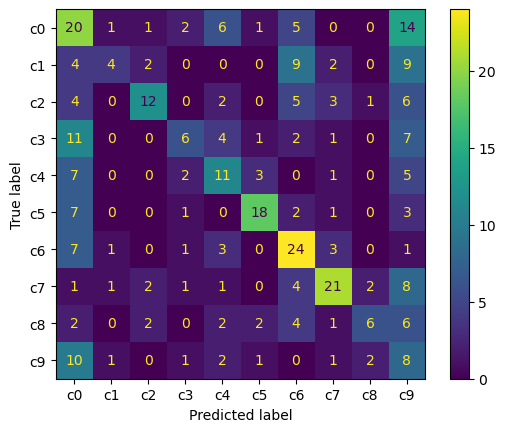

In [39]:
# Plotting the model confusion matrix

class_names = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred
classifier = estimator(model3, class_names)
plot_confusion_matrix(estimator=classifier, 
                      X=test_images, 
                      y_true=np.argmax(test_labels, axis = -1),
                      display_labels=class_names);

### Model 4 - InceptionV3

In [40]:
# Defining the inceptionV3 model

inception_v3 = InceptionV3(weights='imagenet', include_top=False, input_shape = (160,120,3))

# Freezing all layers but the last 3

for layer in inception_v3.layers[:-3]:
    layer.trainable=False

In [41]:
# Building the model

model4 = Sequential()
model4.add(inception_v3)

model4.add(layers.Flatten())
model4.add(layers.Dense(512,activation='relu'))
model4.add(layers.Dense(10,activation='softmax'))

In [42]:
# Defining early stopping
es = EarlyStopping(monitor = 'val_acc', mode = 'max', min_delta = 1e-8, 
                  patience = 10)

# Compiling the model
model4.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [43]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 2, 2048)        21802784  
                                                                 
 flatten_4 (Flatten)         (None, 12288)             0         
                                                                 
 dense_7 (Dense)             (None, 512)               6291968   
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 28,099,882
Trainable params: 6,297,098
Non-trainable params: 21,802,784
_________________________________________________________________


In [44]:
# Fitting the model

history_4 = model4.fit(train_images,
                    train_labels,
                    epochs=30,
                    callbacks = [es],
                    batch_size = 10,
                    validation_data = (val_images, val_labels))

Epoch 1/30


2022-12-26 23:11:02.904281: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - ETA: 0s - loss: 1.0934 - acc: 0.6736

2022-12-26 23:11:36.900628: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - 44s 58ms/step - loss: 1.0934 - acc: 0.6736 - val_loss: 0.5011 - val_acc: 0.8402
Epoch 2/30
718/718 [==============================] - 39s 54ms/step - loss: 0.2694 - acc: 0.9186 - val_loss: 0.4526 - val_acc: 0.8571
Epoch 3/30
718/718 [==============================] - 38s 54ms/step - loss: 0.1487 - acc: 0.9536 - val_loss: 0.2561 - val_acc: 0.9144
Epoch 4/30
718/718 [==============================] - 38s 54ms/step - loss: 0.0962 - acc: 0.9706 - val_loss: 0.3482 - val_acc: 0.8996
Epoch 5/30
718/718 [==============================] - 38s 53ms/step - loss: 0.0769 - acc: 0.9763 - val_loss: 0.2621 - val_acc: 0.9170
Epoch 6/30
718/718 [==============================] - 38s 53ms/step - loss: 0.0816 - acc: 0.9757 - val_loss: 0.2854 - val_acc: 0.9201
Epoch 7/30
718/718 [==============================] - 38s 53ms/step - loss: 0.0676 - acc: 0.9812 - val_loss: 0.4654 - val_acc: 0.8765
Epoch 8/30
718/718 [==============================] - 38s 52ms/step - los

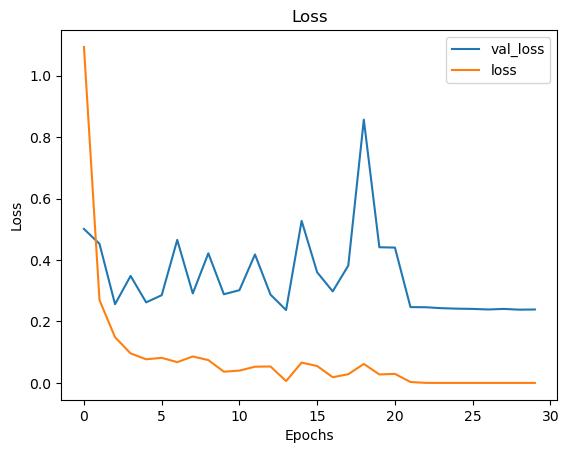

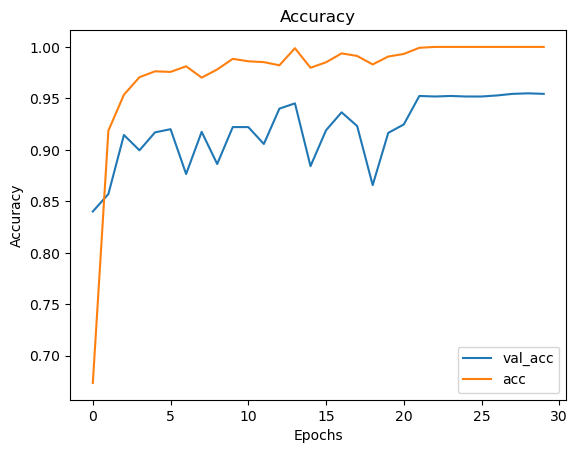

In [45]:
# Plotting accuracy and loss

plt.figure() 
plt.plot(history_4.history['val_loss']) 
plt.plot(history_4.history['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(history_4.history['val_acc'])
plt.plot(history_4.history['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [46]:
# Evaluating the model on train, validation, and test data

model4_results_train = model4.evaluate(train_images, train_labels)
model4_results_val = model4.evaluate(val_images, val_labels)
model4_results_test = model4.evaluate(test_images, test_labels)

11/11 [==============================] - 1s 131ms/step - loss: 5.3035 - acc: 0.4083


2022-12-26 23:30:33.302118: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 2s 137ms/step


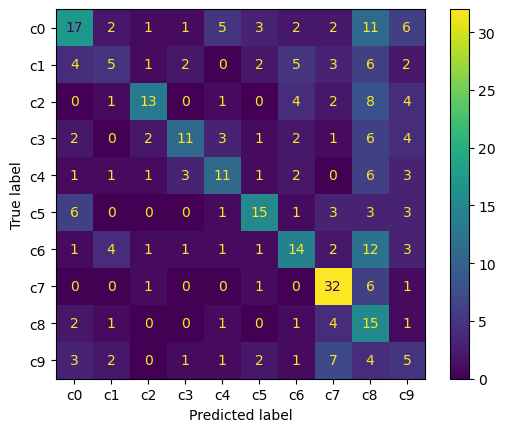

In [47]:
# Plotting the model confusion matrix

class_names = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred
classifier = estimator(model4, class_names)
plot_confusion_matrix(estimator=classifier, 
                      X=test_images, 
                      y_true=np.argmax(test_labels, axis = -1),
                      display_labels=class_names);

### Model 5 - VGG16

In [48]:
# Defining the vgg16 model

vgg16 = VGG16(weights='imagenet', include_top=False, input_shape = (160,120,3))

# Freezing all layers but the last 3

for layer in vgg16.layers[:-3]:
    layer.trainable=False

In [49]:
# Building the model

model5 = Sequential()
model5.add(vgg16)

model5.add(layers.Flatten())
model5.add(layers.Dense(512,activation='relu'))
model5.add(layers.Dense(10,activation='softmax'))

In [50]:
# Defining early stopping

es = EarlyStopping(monitor = 'val_acc', mode = 'max', min_delta = 1e-8, 
                  patience = 10)

# Compiling the model
model5.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [51]:
model5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 5, 3, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 7680)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               3932672   
                                                                 
 dense_10 (Dense)            (None, 10)                5130      
                                                                 
Total params: 18,652,490
Trainable params: 8,657,418
Non-trainable params: 9,995,072
_________________________________________________________________


In [52]:
# Fitting the model

history_5 = model5.fit(train_images,
                    train_labels,
                    epochs=30,
                    callbacks = [es],
                    batch_size = 10,
                    validation_data = (val_images, val_labels))

Epoch 1/30


2022-12-26 23:30:36.943509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - ETA: 0s - loss: 0.4247 - acc: 0.8641

2022-12-26 23:31:57.641346: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - 100s 139ms/step - loss: 0.4247 - acc: 0.8641 - val_loss: 0.0830 - val_acc: 0.9739
Epoch 2/30
718/718 [==============================] - 101s 140ms/step - loss: 0.0714 - acc: 0.9774 - val_loss: 0.0880 - val_acc: 0.9723
Epoch 3/30
718/718 [==============================] - 101s 141ms/step - loss: 0.0403 - acc: 0.9873 - val_loss: 0.0612 - val_acc: 0.9805
Epoch 4/30
718/718 [==============================] - 94s 131ms/step - loss: 0.0190 - acc: 0.9940 - val_loss: 0.1159 - val_acc: 0.9631
Epoch 5/30
718/718 [==============================] - 101s 140ms/step - loss: 0.0312 - acc: 0.9911 - val_loss: 0.0680 - val_acc: 0.9775
Epoch 6/30
718/718 [==============================] - 97s 135ms/step - loss: 0.0418 - acc: 0.9880 - val_loss: 0.0337 - val_acc: 0.9903
Epoch 7/30
718/718 [==============================] - 99s 138ms/step - loss: 0.0134 - acc: 0.9971 - val_loss: 0.0381 - val_acc: 0.9882
Epoch 8/30
718/718 [==============================] - 98s 137m

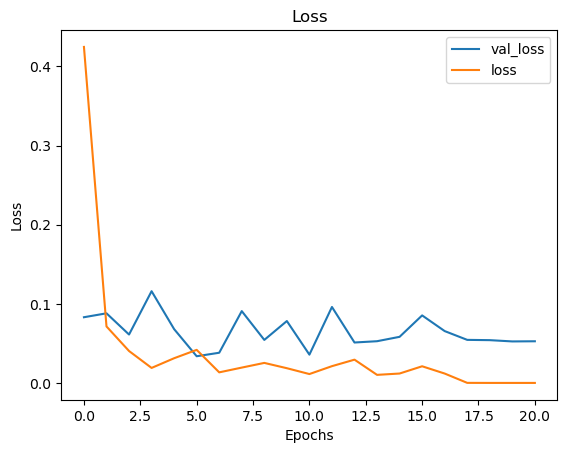

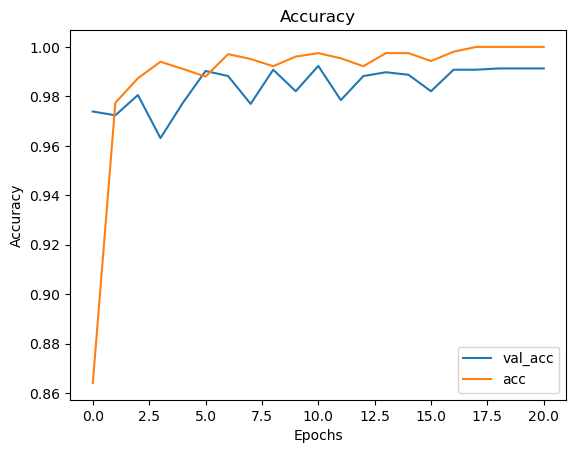

In [53]:
# Plotting accuracy and loss

plt.figure() 
plt.plot(history_5.history['val_loss']) 
plt.plot(history_5.history['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(history_5.history['val_acc'])
plt.plot(history_5.history['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [54]:
# Evaluating the model on train, validation, and test data

model5_results_train = model5.evaluate(train_images, train_labels)
model5_results_val = model5.evaluate(val_images, val_labels)
model5_results_test = model5.evaluate(test_images, test_labels)

11/11 [==============================] - 3s 267ms/step - loss: 2.0924 - acc: 0.7722


2022-12-27 00:05:22.745572: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 3s 254ms/step


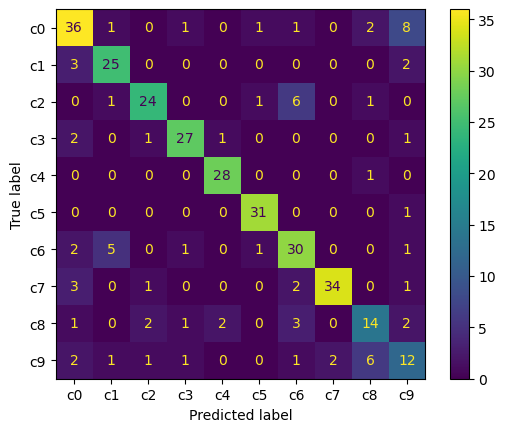

In [55]:
# Plotting the model confusion matrix

class_names = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred
classifier = estimator(model5, class_names)
plot_confusion_matrix(estimator=classifier, 
                      X=test_images, 
                      y_true=np.argmax(test_labels, axis = -1),
                      display_labels=class_names);

### Fine Tuning VGG16

The VGG16 model performed the best out of the pre-trained models (ResNet50, InceptionV3, and VGG16). Therefore, next, I am going to fine tune the VGG16 model.

### Model 6 - VGG16

In [56]:
# Defining the vgg16 model
vgg16_b = VGG16(weights='imagenet', include_top=False, input_shape = (160,120,3))

# Freezing all layers but the last 4

for layer in vgg16_b.layers[:-4]:
    layer.trainable=False

In [57]:
# Building the model

model6 = Sequential()
model6.add(vgg16_b)

model6.add(layers.Flatten())
model6.add(layers.Dense(512,activation='relu'))
model6.add(layers.Dense(10,activation='softmax'))

In [58]:
# Defining early stopping
es = EarlyStopping(monitor = 'val_acc', mode = 'max', min_delta = 1e-8, 
                  patience = 10)

# Compiling the model

model6.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [59]:
model6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 5, 3, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 7680)              0         
                                                                 
 dense_11 (Dense)            (None, 512)               3932672   
                                                                 
 dense_12 (Dense)            (None, 10)                5130      
                                                                 
Total params: 18,652,490
Trainable params: 11,017,226
Non-trainable params: 7,635,264
_________________________________________________________________


In [60]:
# Fitting the model

history_6 = model6.fit(train_images,
                    train_labels,
                    epochs=30,
                    callbacks = [es],
                    batch_size = 10,
                    validation_data = (val_images, val_labels))

Epoch 1/30


2022-12-27 00:05:27.228641: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - ETA: 0s - loss: 0.5027 - acc: 0.8312

2022-12-27 00:06:49.429776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - 100s 138ms/step - loss: 0.5027 - acc: 0.8312 - val_loss: 0.0887 - val_acc: 0.9744
Epoch 2/30
718/718 [==============================] - 99s 138ms/step - loss: 0.0884 - acc: 0.9732 - val_loss: 0.0837 - val_acc: 0.9769
Epoch 3/30
718/718 [==============================] - 97s 135ms/step - loss: 0.0275 - acc: 0.9919 - val_loss: 0.1167 - val_acc: 0.9667
Epoch 4/30
718/718 [==============================] - 98s 136ms/step - loss: 0.0515 - acc: 0.9835 - val_loss: 0.0857 - val_acc: 0.9749
Epoch 5/30
718/718 [==============================] - 96s 134ms/step - loss: 0.0299 - acc: 0.9925 - val_loss: 0.2402 - val_acc: 0.9559
Epoch 6/30
718/718 [==============================] - 99s 138ms/step - loss: 0.0240 - acc: 0.9936 - val_loss: 0.0370 - val_acc: 0.9939
Epoch 7/30
718/718 [==============================] - 97s 135ms/step - loss: 0.0461 - acc: 0.9905 - val_loss: 0.0357 - val_acc: 0.9913
Epoch 8/30
718/718 [==============================] - 117s 163ms/

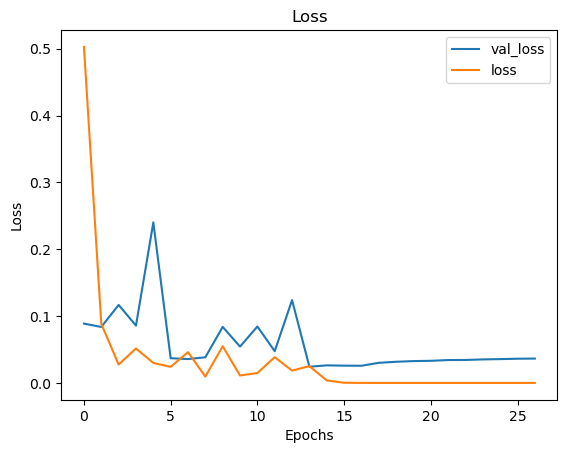

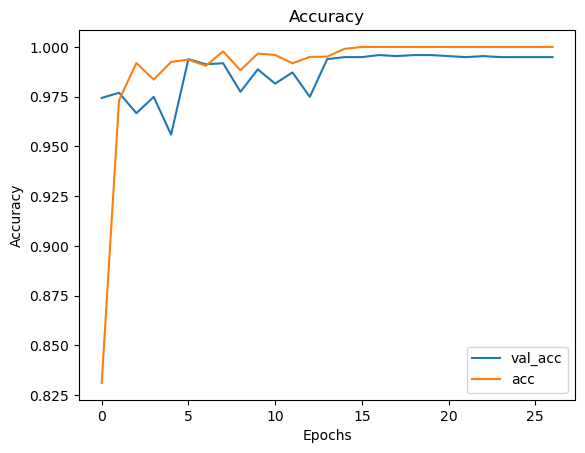

In [61]:
# Plotting accuracy and loss
plt.figure() 
plt.plot(history_6.history['val_loss']) 
plt.plot(history_6.history['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(history_6.history['val_acc'])
plt.plot(history_6.history['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [62]:
# Evaluating the model on train, validation, and test data

model6_results_train = model6.evaluate(train_images, train_labels)
model6_results_val = model6.evaluate(val_images, val_labels)
model6_results_test = model6.evaluate(test_images, test_labels)

11/11 [==============================] - 2s 227ms/step - loss: 2.0502 - acc: 0.7899


2022-12-27 00:48:16.336947: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 2s 216ms/step


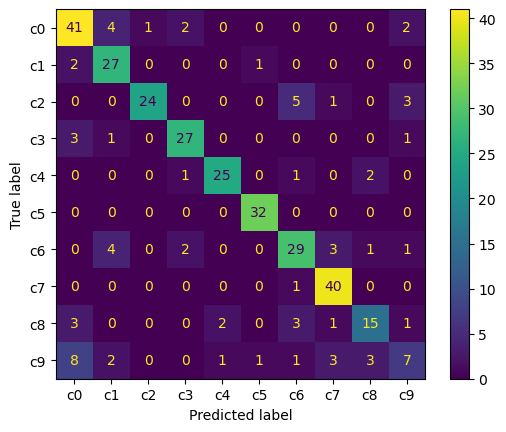

In [63]:
# Plotting the model confusion matrix

class_names = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred
classifier = estimator(model6, class_names)
plot_confusion_matrix(estimator=classifier, 
                      X=test_images, 
                      y_true=np.argmax(test_labels, axis = -1),
                      display_labels=class_names);

### Model 7  - VGG16

In [64]:
# Defining the vgg16 model

vgg16_c = VGG16(weights='imagenet', include_top=False, input_shape = (160,120,3))

# Freezing all layers but the last 5

for layer in vgg16_c.layers[:-5]:
    layer.trainable=False

In [65]:
# Building the model

model7 = Sequential()
model7.add(vgg16_c)

model7.add(layers.Flatten())
model7.add(layers.Dense(512,activation='relu'))
model7.add(layers.Dense(10,activation='softmax'))

In [66]:
# Defining early stopping

es = EarlyStopping(monitor = 'val_acc', mode = 'max', min_delta = 1e-8, 
                  patience = 10)

# Compiling the model

model7.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [67]:
model7.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 5, 3, 512)         14714688  
                                                                 
 flatten_7 (Flatten)         (None, 7680)              0         
                                                                 
 dense_13 (Dense)            (None, 512)               3932672   
                                                                 
 dense_14 (Dense)            (None, 10)                5130      
                                                                 
Total params: 18,652,490
Trainable params: 11,017,226
Non-trainable params: 7,635,264
_________________________________________________________________


In [68]:
# Fitting the model

history_7 = model7.fit(train_images,
                    train_labels,
                    epochs=30,
                    callbacks = [es],
                    batch_size = 10,
                    validation_data = (val_images, val_labels))

Epoch 1/30


2022-12-27 00:48:20.618663: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - ETA: 0s - loss: 0.4575 - acc: 0.8508

2022-12-27 00:49:26.740572: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - 81s 112ms/step - loss: 0.4575 - acc: 0.8508 - val_loss: 0.1433 - val_acc: 0.9549
Epoch 2/30
718/718 [==============================] - 77s 108ms/step - loss: 0.0729 - acc: 0.9787 - val_loss: 0.1061 - val_acc: 0.9626
Epoch 3/30
718/718 [==============================] - 79s 110ms/step - loss: 0.0546 - acc: 0.9849 - val_loss: 0.0771 - val_acc: 0.9800
Epoch 4/30
718/718 [==============================] - 78s 108ms/step - loss: 0.0326 - acc: 0.9902 - val_loss: 0.2339 - val_acc: 0.9355
Epoch 5/30
718/718 [==============================] - 78s 109ms/step - loss: 0.0526 - acc: 0.9849 - val_loss: 0.0371 - val_acc: 0.9908
Epoch 6/30
718/718 [==============================] - 78s 109ms/step - loss: 0.0116 - acc: 0.9969 - val_loss: 0.0663 - val_acc: 0.9816
Epoch 7/30
718/718 [==============================] - 78s 109ms/step - loss: 0.0480 - acc: 0.9866 - val_loss: 0.0383 - val_acc: 0.9882
Epoch 8/30
718/718 [==============================] - 78s 109ms/st

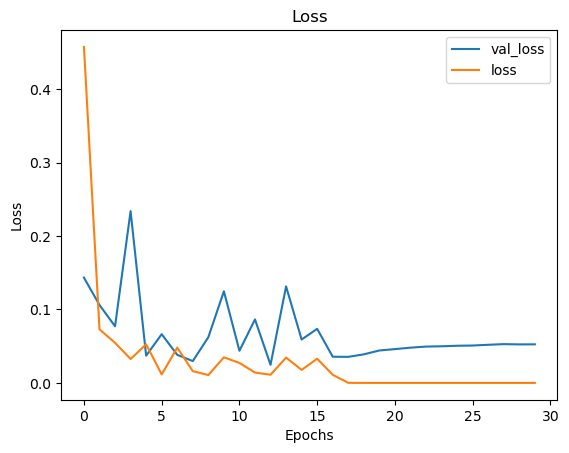

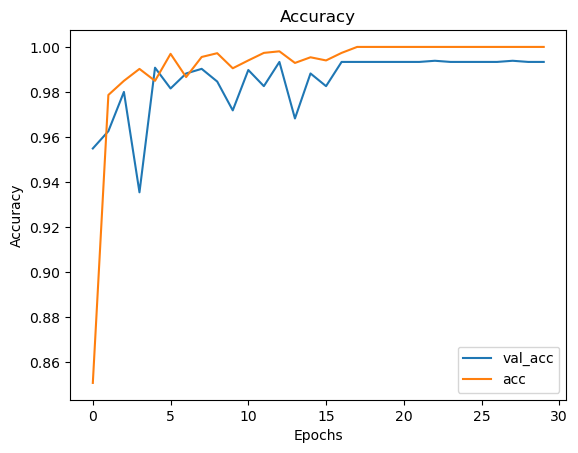

In [69]:
# Plotting accuracy and loss

plt.figure() 
plt.plot(history_7.history['val_loss']) 
plt.plot(history_7.history['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(history_7.history['val_acc'])
plt.plot(history_7.history['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [70]:
# Evaluating the model on train, validation, and test data

model7_results_train = model7.evaluate(train_images, train_labels)
model7_results_val = model7.evaluate(val_images, val_labels)
model7_results_test = model7.evaluate(test_images, test_labels)

11/11 [==============================] - 3s 232ms/step - loss: 2.2894 - acc: 0.7840


2022-12-27 01:29:52.416428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 2s 221ms/step


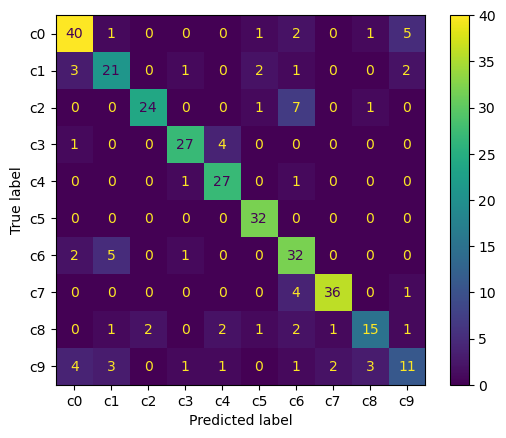

In [71]:
# Plotting the model confusion matrix

class_names = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred
classifier = estimator(model7, class_names)
plot_confusion_matrix(estimator=classifier, 
                      X=test_images, 
                      y_true=np.argmax(test_labels, axis = -1),
                      display_labels=class_names);

### Model 8  - VGG16

In [72]:
# Defining the vgg16 model

vgg16_d = VGG16(weights='imagenet', include_top=False, input_shape = (160,120,3))

# Freezing all layers but the last 7

for layer in vgg16_d.layers[:-7]:
    layer.trainable=False

In [73]:
# Building the model

model8 = Sequential()
model8.add(vgg16_d)

model8.add(layers.Flatten())
model8.add(layers.Dense(512,activation='relu'))
model8.add(layers.Dense(10,activation='softmax'))

In [74]:
# Defining early stopping

es = EarlyStopping(monitor = 'val_acc', mode = 'max', min_delta = 1e-8, 
                  patience = 10)

# Compiling the model

model8.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [75]:
model8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 5, 3, 512)         14714688  
                                                                 
 flatten_8 (Flatten)         (None, 7680)              0         
                                                                 
 dense_15 (Dense)            (None, 512)               3932672   
                                                                 
 dense_16 (Dense)            (None, 10)                5130      
                                                                 
Total params: 18,652,490
Trainable params: 15,736,842
Non-trainable params: 2,915,648
_________________________________________________________________


In [76]:
# Fitting the model

history_8 = model8.fit(train_images,
                    train_labels,
                    epochs=30,
                    callbacks = [es],
                    batch_size = 10,
                    validation_data = (val_images, val_labels))

Epoch 1/30


2022-12-27 01:29:56.524094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - ETA: 0s - loss: 0.6555 - acc: 0.7769

2022-12-27 01:31:23.225904: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - 101s 140ms/step - loss: 0.6555 - acc: 0.7769 - val_loss: 0.1338 - val_acc: 0.9539
Epoch 2/30
718/718 [==============================] - 96s 134ms/step - loss: 0.1210 - acc: 0.9632 - val_loss: 0.0738 - val_acc: 0.9780
Epoch 3/30
718/718 [==============================] - 97s 135ms/step - loss: 0.0519 - acc: 0.9842 - val_loss: 0.1333 - val_acc: 0.9616
Epoch 4/30
718/718 [==============================] - 94s 131ms/step - loss: 0.0671 - acc: 0.9791 - val_loss: 0.0669 - val_acc: 0.9800
Epoch 5/30
718/718 [==============================] - 94s 131ms/step - loss: 0.0635 - acc: 0.9817 - val_loss: 0.0576 - val_acc: 0.9857
Epoch 6/30
718/718 [==============================] - 93s 130ms/step - loss: 0.0159 - acc: 0.9955 - val_loss: 0.2037 - val_acc: 0.9657
Epoch 7/30
718/718 [==============================] - 97s 135ms/step - loss: 0.0549 - acc: 0.9870 - val_loss: 0.0714 - val_acc: 0.9816
Epoch 8/30
718/718 [==============================] - 94s 131ms/s

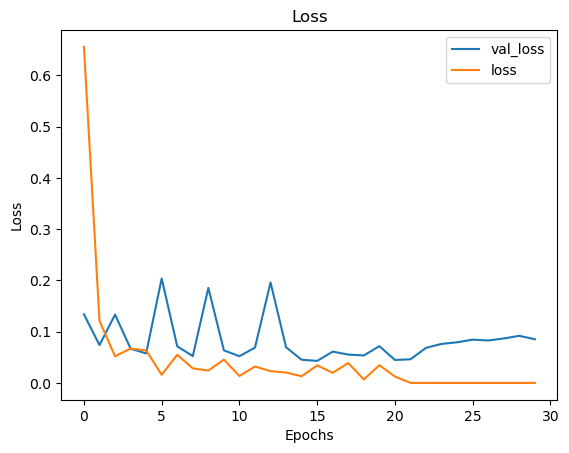

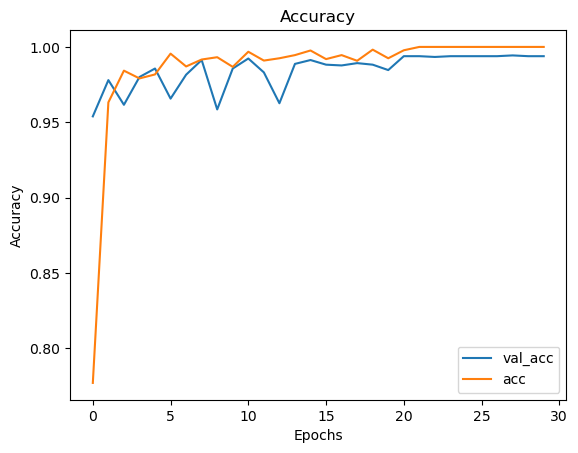

In [77]:
# Plotting accuracy and loss

plt.figure() 
plt.plot(history_8.history['val_loss']) 
plt.plot(history_8.history['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(history_8.history['val_acc'])
plt.plot(history_8.history['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [78]:
# Evaluating the model on train, validation, and test data

model8_results_train = model8.evaluate(train_images, train_labels)
model8_results_val = model8.evaluate(val_images, val_labels)
model8_results_test = model8.evaluate(test_images, test_labels)

11/11 [==============================] - 2s 220ms/step - loss: 1.5792 - acc: 0.8343


2022-12-27 02:17:53.564280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 2s 215ms/step


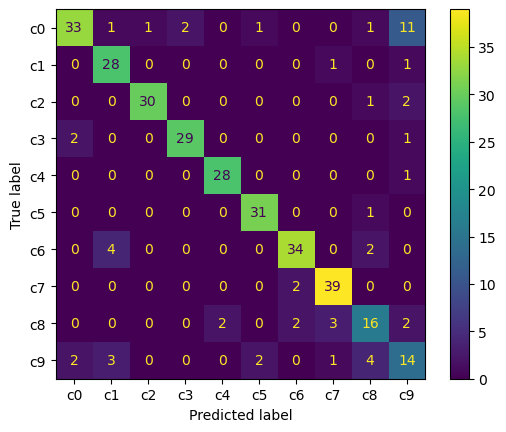

In [79]:
# Plotting the model confusion matrix

class_names = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred
classifier = estimator(model8, class_names)
plot_confusion_matrix(estimator=classifier, 
                      X=test_images, 
                      y_true=np.argmax(test_labels, axis = -1),
                      display_labels=class_names);

### Model 9  - VGG16

In [299]:
# Defining the vgg16 model

vgg16_e = VGG16(weights='imagenet', include_top=False, input_shape = (160,120,3))

# Freezing all layers but the last 9

for layer in vgg16_e.layers[:-9]:
    layer.trainable=False

In [300]:
# Building the model
model9 = Sequential()
model9.add(vgg16_e)

model9.add(layers.Flatten())
model9.add(layers.Dense(512,activation='relu'))
model9.add(layers.Dense(10,activation='softmax'))

In [301]:
# Defining early stopping

es = EarlyStopping(monitor = 'val_acc', mode = 'max', min_delta = 1e-8, 
                  patience = 10)

# Compiling the model

model9.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [302]:
model9.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 5, 3, 512)         14714688  
                                                                 
 flatten_26 (Flatten)        (None, 7680)              0         
                                                                 
 dense_50 (Dense)            (None, 512)               3932672   
                                                                 
 dense_51 (Dense)            (None, 10)                5130      
                                                                 
Total params: 18,652,490
Trainable params: 16,917,002
Non-trainable params: 1,735,488
_________________________________________________________________


In [ ]:
# Fitting the model

history_9 = model9.fit(train_images,
                    train_labels,
                    epochs=30,
                    callbacks = [es],
                    batch_size = 10,
                    validation_data = (val_images, val_labels))

Epoch 1/30


2022-12-29 00:57:09.424003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - ETA: 0s - loss: 0.6167 - acc: 0.7892

2022-12-29 00:58:22.954611: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - 84s 116ms/step - loss: 0.6167 - acc: 0.7892 - val_loss: 0.1515 - val_acc: 0.9492
Epoch 2/30
718/718 [==============================] - 127s 177ms/step - loss: 0.1200 - acc: 0.9634 - val_loss: 0.1356 - val_acc: 0.9587
Epoch 3/30
718/718 [==============================] - 107s 149ms/step - loss: 0.0885 - acc: 0.9719 - val_loss: 0.1254 - val_acc: 0.9632
Epoch 4/30
718/718 [==============================] - 104s 144ms/step - loss: 0.0487 - acc: 0.9858 - val_loss: 0.1715 - val_acc: 0.9464
Epoch 5/30
718/718 [==============================] - 103s 144ms/step - loss: 0.0705 - acc: 0.9799 - val_loss: 0.1161 - val_acc: 0.9643
Epoch 6/30
718/718 [==============================] - 109s 151ms/step - loss: 0.0390 - acc: 0.9894 - val_loss: 0.1143 - val_acc: 0.9732
Epoch 7/30
718/718 [==============================] - 106s 147ms/step - loss: 0.0570 - acc: 0.9841 - val_loss: 0.0675 - val_acc: 0.9833
Epoch 8/30
718/718 [==============================] - 107s 1

In [ ]:
# Plotting accuracy and loss
plt.figure() 
plt.plot(history_9.history['val_loss']) 
plt.plot(history_9.history['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(history_9.history['val_acc'])
plt.plot(history_9.history['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Evaluating the model on train, validation, and test data

model9_results_train = model9.evaluate(train_images, train_labels)
model9_results_val = model9.evaluate(val_images, val_labels)
model9_results_test = model9.evaluate(test_images, test_labels)

In [ ]:
# Plotting the model confusion matrix

class_names = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred
classifier = estimator(model9, class_names)
plot_confusion_matrix(estimator=classifier, 
                      X=test_images, 
                      y_true=np.argmax(test_labels, axis = -1),
                      display_labels=class_names);

## Evaluation

After reviewing the test accuracy for each model, the final model for my project is Model 9. It has a test accuracy of 88.76%, which was achieved by using VGG16, a pre-trained model, with all but the last 9 layers frozen.

### Saving Model 9

In [164]:
# Serialize model 9 to JSON

model9_json = model9.to_json()
with open("models/model9.json", "w") as json_file:
    json_file.write(model9_json)
    
# Serialize weights to HDF5

model9.save_weights("models/model9.h5")

In [165]:
# Pickling model 9

with open("models/model9.pkl", "wb") as f:
    pickle.dump(model9, f)

INFO:tensorflow:Assets written to: ram://53fb2ada-9794-43b8-8b9c-1a12569a2fb6/assets


INFO:tensorflow:Assets written to: ram://53fb2ada-9794-43b8-8b9c-1a12569a2fb6/assets


### Testing the Model on Sample Images

In [166]:
# Loading model 9

with open('models/model9.pkl' , 'rb') as f:
    model = pickle.load(f)

In [167]:
# Creating a function that loads the image files

def load(filename):
    image = Image.open(filename)
    image = np.array(image).astype('float32')/255
    image = transform.resize(image, (160, 120, 3))
    image = np.expand_dims(image, axis=0)
    return image

#### Class 0

In [168]:
image_0 = load('unlabelled_test_data/img_255.jpg')
prediction = model.predict(image_0)

2022-12-28 15:53:50.540294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 273ms/step


In [169]:
prediction_list = prediction[0].tolist()

In [170]:
max_value = max(prediction_list)
index = prediction_list.index(max_value)
print("Class:", index)

Class: 0


#### Class 1

In [171]:
image_1 = load('unlabelled_test_data/img_159.jpg')
prediction = model.predict(image_1)

1/1 [==============================] - 0s 14ms/step


In [172]:
prediction_list = prediction[0].tolist()

In [173]:
max_value = max(prediction_list)
index = prediction_list.index(max_value)
print("Class:", index)

Class: 1


#### Class 2

In [174]:
image_2 = load('unlabelled_test_data/img_161.jpg')
prediction = model.predict(image_2)

1/1 [==============================] - 0s 50ms/step


In [175]:
prediction_list = prediction[0].tolist()

In [176]:
max_value = max(prediction_list)
index = prediction_list.index(max_value)
print("Class:", index)

Class: 2


#### Class 3

In [177]:
image_3 = load('unlabelled_test_data/img_287.jpg')
prediction = model.predict(image_3)

1/1 [==============================] - 0s 12ms/step


In [178]:
prediction_list = prediction[0].tolist()

In [179]:
max_value = max(prediction_list)
index = prediction_list.index(max_value)
print("Class:", index)

Class: 3


#### Class 4

In [180]:
image_4 = load('unlabelled_test_data/img_227.jpg')
prediction = model.predict(image_4)

1/1 [==============================] - 0s 11ms/step


In [181]:
prediction_list = prediction[0].tolist()

In [182]:
max_value = max(prediction_list)
index = prediction_list.index(max_value)
print("Class:", index)

Class: 4


#### Class 5

In [183]:
image_5 = load('unlabelled_test_data/img_221.jpg')
prediction = model.predict(image_5)

1/1 [==============================] - 0s 12ms/step


In [184]:
prediction_list = prediction[0].tolist()

In [185]:
max_value = max(prediction_list)
index = prediction_list.index(max_value)
print("Class:", index)

Class: 5


#### Class 6

In [186]:
image_6 = load('unlabelled_test_data/img_175.jpg')
prediction = model.predict(image_6)

1/1 [==============================] - 0s 11ms/step


In [187]:
prediction_list = prediction[0].tolist()

In [188]:
max_value = max(prediction_list)
index = prediction_list.index(max_value)
print("Class:", index)

Class: 6


#### Class 7

In [189]:
image_7 = load('unlabelled_test_data/img_252.jpg')
prediction = model.predict(image_7)

1/1 [==============================] - 0s 11ms/step


In [190]:
prediction_list = prediction[0].tolist()

In [191]:
max_value = max(prediction_list)
index = prediction_list.index(max_value)
print("Class:", index)

Class: 7


#### Class 8

In [210]:
image_8 = load('unlabelled_test_data/img_377.jpg')
prediction = model.predict(image_8)

1/1 [==============================] - 0s 12ms/step


In [211]:
prediction_list = prediction[0].tolist()

In [212]:
max_value = max(prediction_list)
index = prediction_list.index(max_value)
print("Class:", index)

Class: 8


#### Class 9

In [195]:
image_9 = load('unlabelled_test_data/img_164.jpg')
prediction = model.predict(image_9)

1/1 [==============================] - 0s 12ms/step


In [196]:
prediction_list = prediction[0].tolist()

In [197]:
max_value = max(prediction_list)
index = prediction_list.index(max_value)
print("Class:", index)

Class: 9


## Deployed Model

## Conclusions

### Limitations

* The test images had to be manually labeled, and as a result, the size of the test data is small
* The images are from a single angle, so in practice, the State Farm dashcam would need to be positioned the same way

### Next Steps

* Obtain a greater amount of labeled test data
* Build the model based on images from various angles
* Analyze a potential relationship between the use of a dashcam and improvements in driving behaviors